<a href="https://colab.research.google.com/github/asmyasikova83/data_analysis/blob/main/marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Загрузка**

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import ScalarFormatter
from scipy.stats import pearsonr

# избавиться от предупреждений
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/Zerocoder/marketplace_dataframe.csv")

##**Предобработка**

In [164]:

#remove col Unnamed
df = df.drop(columns=['Unnamed: 0'])
#Преобразование столбцов к нужным типам данных
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y')
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format='%d.%m.%Y')
df['Количество заказов'] = df['Количество заказов'].astype(int)
#remove na if any
df = df.dropna()


##*За какой период данные*

In [165]:
start_date = df['Дата создания'].min()
end_date = df['Дата создания'].max()
print(f'Данные охватывают период с {start_date} по {end_date}')

Данные охватывают период с 2021-07-01 00:00:00 по 2022-01-12 00:00:00


##*Сколько уникальных клиентов, категорий, методов оплат*

In [166]:
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()

print(unique_clients)
print(unique_categories)
print(unique_payment_methods)
print(unique_statuses)

30874
16
10
9


In [167]:
df['Категория'].unique()

array(['Женская мода', 'Красота и уход', 'Традиционные подарки',
       'Мобильные телефоны и планшеты', 'Бытовая техника', 'Дом и быт',
       'Мужская мода', 'Дети и младенцы', '\\N', 'Компьютерная техника',
       'Гипермаркет', 'Другое', 'Здоровье и спорт', 'Развлечения',
       'Книги', 'Школа и образование'], dtype=object)

In [168]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [169]:
df['Метод оплаты'].unique()

array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

##*Средний чек клиента*


In [196]:
average_order_value = df.query('Статус in ("завершен", "получен")')['Итоговая сумма'].mean()
print(f'Средний чек клиента: {average_order_value:.2f} RuR')

Средний чек клиента: 2716.68 RuR


##*Распределение по статусам*

In [ ]:
status_distribution = df['Статус'].value_counts()


##*Визуализация распределения по статусам*

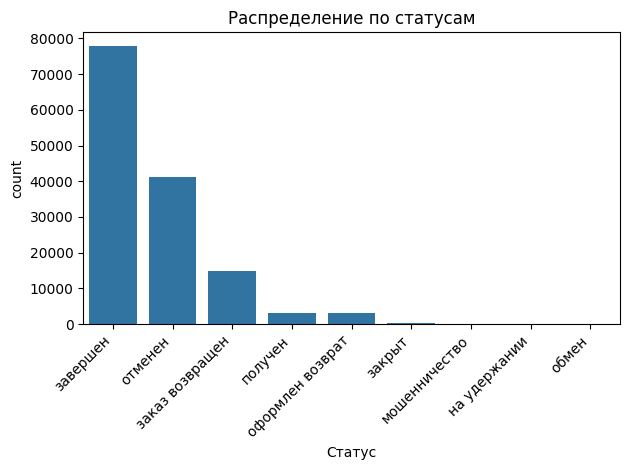

In [172]:


ax = sns.countplot(data=df, x='Статус')
#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Распределение по статусам')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

In [173]:
status_distribution.head()

Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
Name: count, dtype: int64

###*Динамика продаж*

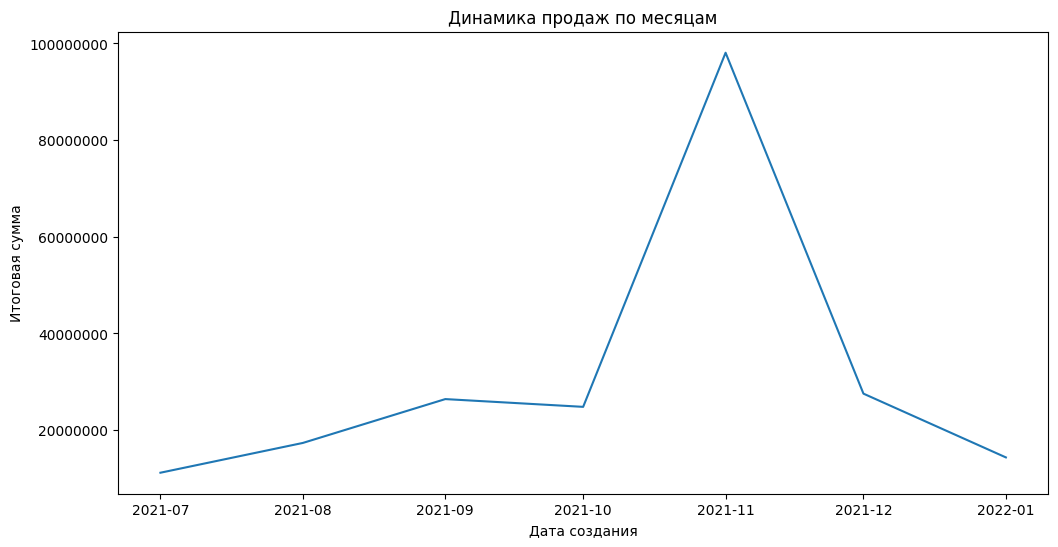

In [207]:
sales_trend = df.query('Статус in ("завершен", "получен")').groupby(df['Дата создания'].dt.to_period('M')).agg({'Итоговая сумма': 'sum' }).reset_index()
sales_trend['Дата создания'] = sales_trend['Дата создания'].dt.to_timestamp()

plt.figure(figsize = (12, 6))
ax = sns.lineplot(data=sales_trend, x='Дата создания', y='Итоговая сумма')
ax.set_title('Динамика продаж по месяцам')

#Отключение научной нотации
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [208]:
sales_trend

,Дата создания,Итоговая сумма
0,2021-07-01,11178180
1,2021-08-01,17341010
2,2021-09-01,26411783
3,2021-10-01,24806291
4,2021-11-01,98070888
5,2021-12-01,27540437
6,2022-01-01,14346538


In [204]:
orders_trend = df.query('Статус in ("завершен", "получен")').groupby(df['Дата создания'].dt.to_period('M')).agg({'Количество заказов': 'sum' }).reset_index()
orders_trend['Дата создания'] = orders_trend['Дата создания'].dt.to_timestamp()
orders_trend

,Дата создания,Количество заказов
0,2021-07-01,6315
1,2021-08-01,8448
2,2021-09-01,9084
3,2021-10-01,9045
4,2021-11-01,42278
5,2021-12-01,9123
6,2022-01-01,4442


##*Продажи по дням недели*

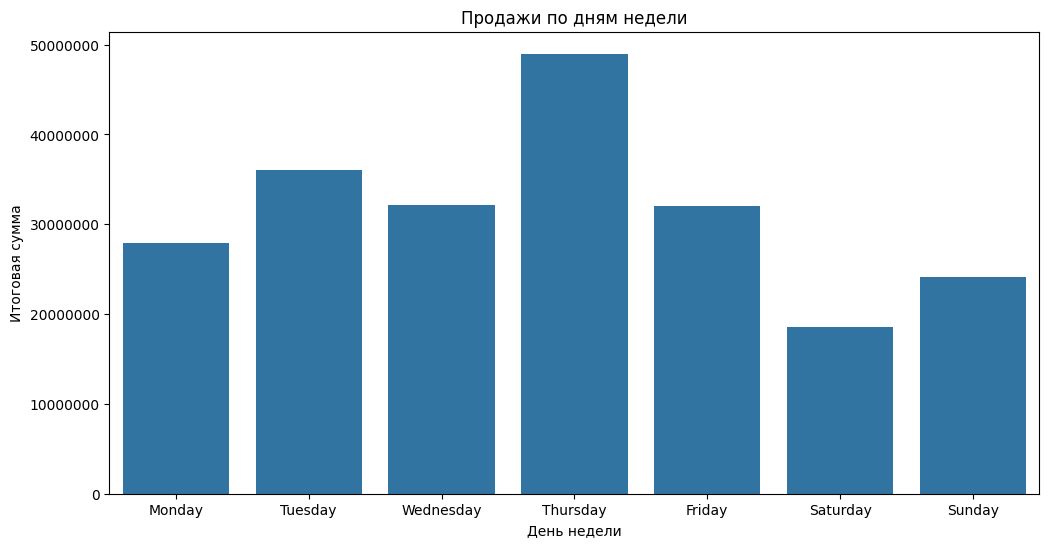

In [205]:
df['День недели'] = df['Дата создания'].dt.day_name()
weekday_sales = df.query('Статус in ("завершен", "получен")').groupby('День недели').agg({'Итоговая сумма': 'sum'}).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize = (12, 6))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales['Итоговая сумма'])
ax.set_title('Продажи по дням недели')
#Отключение научной нотации
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

##*GMV по каждой категории*

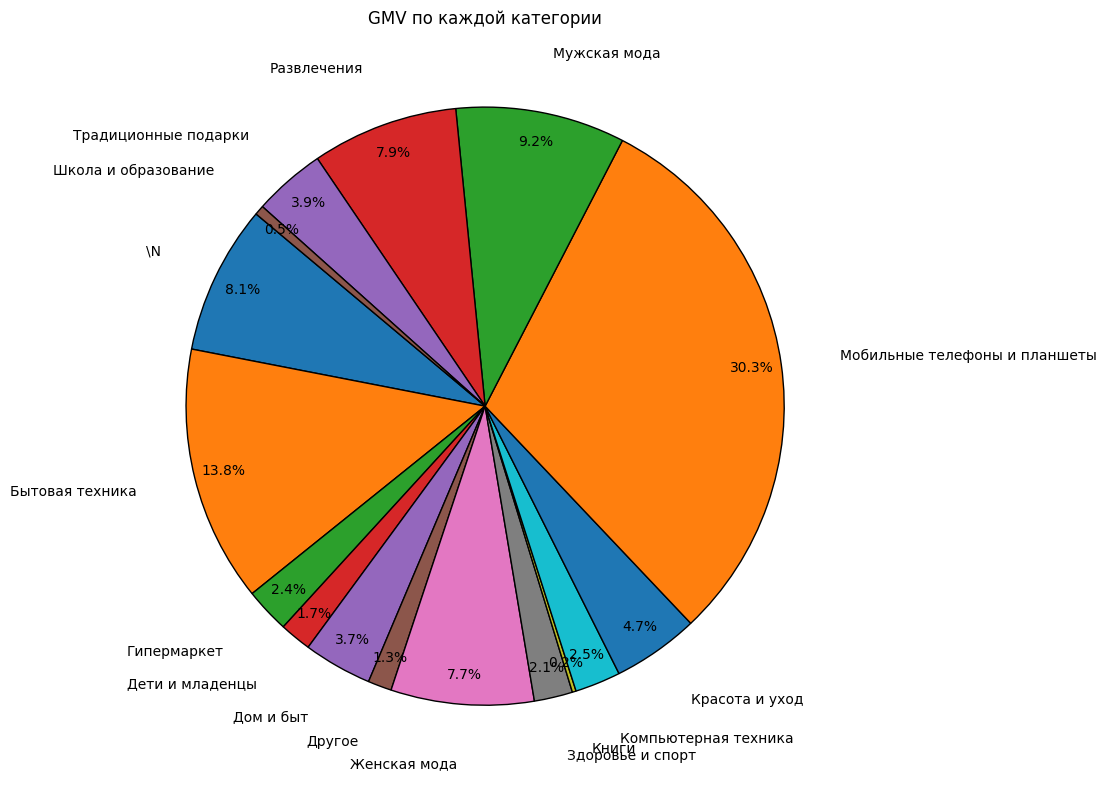

In [206]:
gmv_by_category = df.query('Статус in ("завершен", "получен")').groupby('Категория').agg({'Итоговая сумма': 'sum'}).reset_index()

plt.figure(figsize = (10, 8))
plt.pie(gmv_by_category['Итоговая сумма'], labels=gmv_by_category['Категория'], autopct='%1.1f%%', startangle=140,
        labeldistance = 1.2, pctdistance = 0.9, wedgeprops={'edgecolor': 'black'})
plt.title('GMV по каждой категории')
plt.tight_layout()
plt.show()

In [178]:
gmv_by_category

,Категория,Итоговая сумма
0,\N,36772543
1,Бытовая техника,97934753
2,Гипермаркет,10971331
3,Дети и младенцы,8749241
4,Дом и быт,20283158
5,Другое,5199769
6,Женская мода,36405325
7,Здоровье и спорт,9896442
8,Книги,644076
9,Компьютерная техника,43589022


##*Доля отмен*

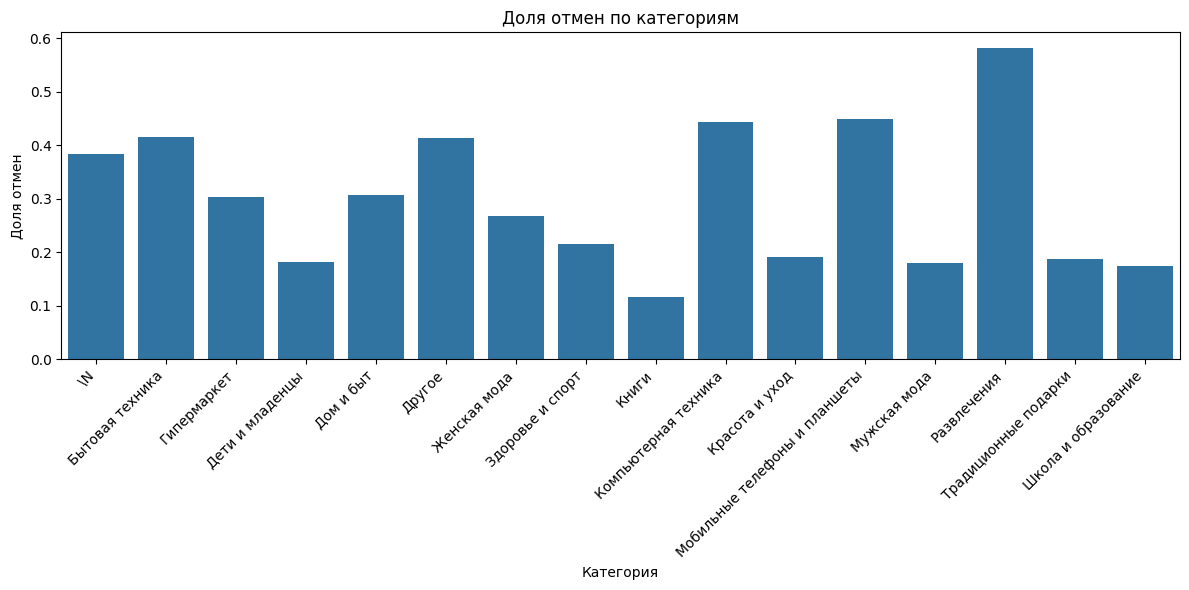

In [179]:
cancellation_rate = df[df['Статус'] == 'отменен'].groupby('Категория').size() / df.groupby('Категория').size()
cancellation_rate = cancellation_rate.fillna(0).reset_index(name='Доля отмен')

#Визуализация доли отмен по категориям

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Категория', y='Доля отмен', data=cancellation_rate)
ax.set_title('Доля отмен по категориям')
ax.set_ylabel('Доля отмен')
ax.set_xlabel('Категория')

#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

In [180]:
cancellation_rate

,Категория,Доля отмен
0,\N,0.383206
1,Бытовая техника,0.416276
2,Гипермаркет,0.302626
3,Дети и младенцы,0.181940
4,Дом и быт,0.306903
5,Другое,0.414147
6,Женская мода,0.268658
7,Здоровье и спорт,0.215196
8,Книги,0.116592
9,Компьютерная техника,0.444076


##*На какие категории скидки*

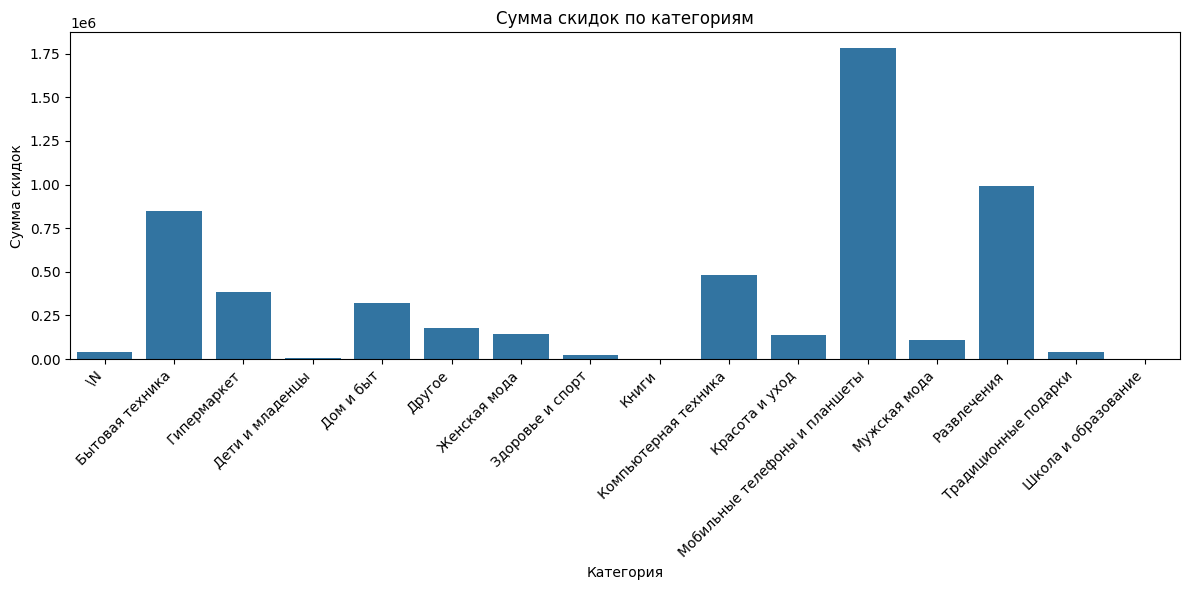

In [209]:
#Преобразование к нужному типу данных
df['Категория'] = df['Категория'].astype('str')
df['Сумма скидки'] = pd.to_numeric(df['Сумма скидки'], errors='coerce')

discounted_categories = df[df['Сумма скидки'] > 0]['Категория'].unique()

#Вычисление суммы скидок по категориям
discounted_by_category = df.query('Статус in ("завершен", "получен")').groupby('Категория').agg({'Сумма скидки' : 'sum'}).reset_index()

#Визуализация суммы скидок по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Категория', y='Сумма скидки', data=discounted_by_category)
ax.set_title('Сумма скидок по категориям')
ax.set_ylabel('Сумма скидок')
ax.set_xlabel('Категория')

#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

##*Рейтинг самых продаваемых товаров*

In [210]:
#Рейтинг самых продаваемых товаров с категорией
df['Количество заказов'] = pd.to_numeric(df['Количество заказов'], errors='coerce')
df['Артикул товара'] = df['Артикул товара'].astype('str')
df['Категория'] = df['Категория'].astype('str')

top_products = df.query('Статус in ("завершен", "получен")').groupby(['Артикул товара', 'Категория']).agg({'Количество заказов' : 'sum'}).reset_index()
top_products = top_products.sort_values(by='Количество заказов', ascending=False).reset_index(drop=True)
top_products.head(10)

,Артикул товара,Категория,Количество заказов
0,Al Muhafiz Sohan Halwa Almond,Традиционные подарки,1615
1,kcc_krone deal,Красота и уход,1335
2,RS_Plain Rusk,Традиционные подарки,1183
3,unilever_Deal-6,Гипермаркет,766
4,emart_00-7,Дом и быт,747
5,CA_shirt-Small,Мужская мода,683
6,RB_Household Bundle,Гипермаркет,679
7,Al Muhafiz Sohan Halwa Walnut,Традиционные подарки,627
8,Telemall_MM-DR-HB-L,\N,568
9,emart_00-1,\N,547


##*Сравнить показатели по айфону и галакси*

In [183]:
#Фильтрация строк
galaxy_df = df[df['Артикул товара'].str.contains('galaxy', case=False, na=False)]
iphone_df = df[df['Артикул товара'].str.contains('iphone', case=False, na=False)]

In [184]:
#Приведение типов
galaxy_df['Количество заказов'] = pd.to_numeric(galaxy_df['Количество заказов'], errors='coerce')
galaxy_df['Итоговая сумма'] = pd.to_numeric(galaxy_df['Итоговая сумма'], errors='coerce')
iphone_df['Количество заказов'] = pd.to_numeric(iphone_df['Количество заказов'], errors='coerce')
iphone_df['Итоговая сумма'] = pd.to_numeric(iphone_df['Итоговая сумма'], errors='coerce')

#Приведение по статусу
statuses = ['завершен', 'получен']
filtered_galaxy_df = galaxy_df[galaxy_df['Статус'].isin(statuses)]
filtered_iphone_df = iphone_df[iphone_df['Статус'].isin(statuses)]

#Агрегирование
galaxy_agg = filtered_galaxy_df.agg({'Количество заказов' : 'sum', 'Итоговая сумма' : 'sum'}).reset_index()
iphone_agg = filtered_iphone_df.agg({'Количество заказов' : 'sum', 'Итоговая сумма' : 'sum'}).reset_index()

#Переименование
galaxy_agg.columns = ['Показатель', 'Galaxy']
iphone_agg.columns = ['Показатель', 'Iphone']

#Объединение
comparison_df = pd.merge(iphone_agg, galaxy_agg, on='Показатель')

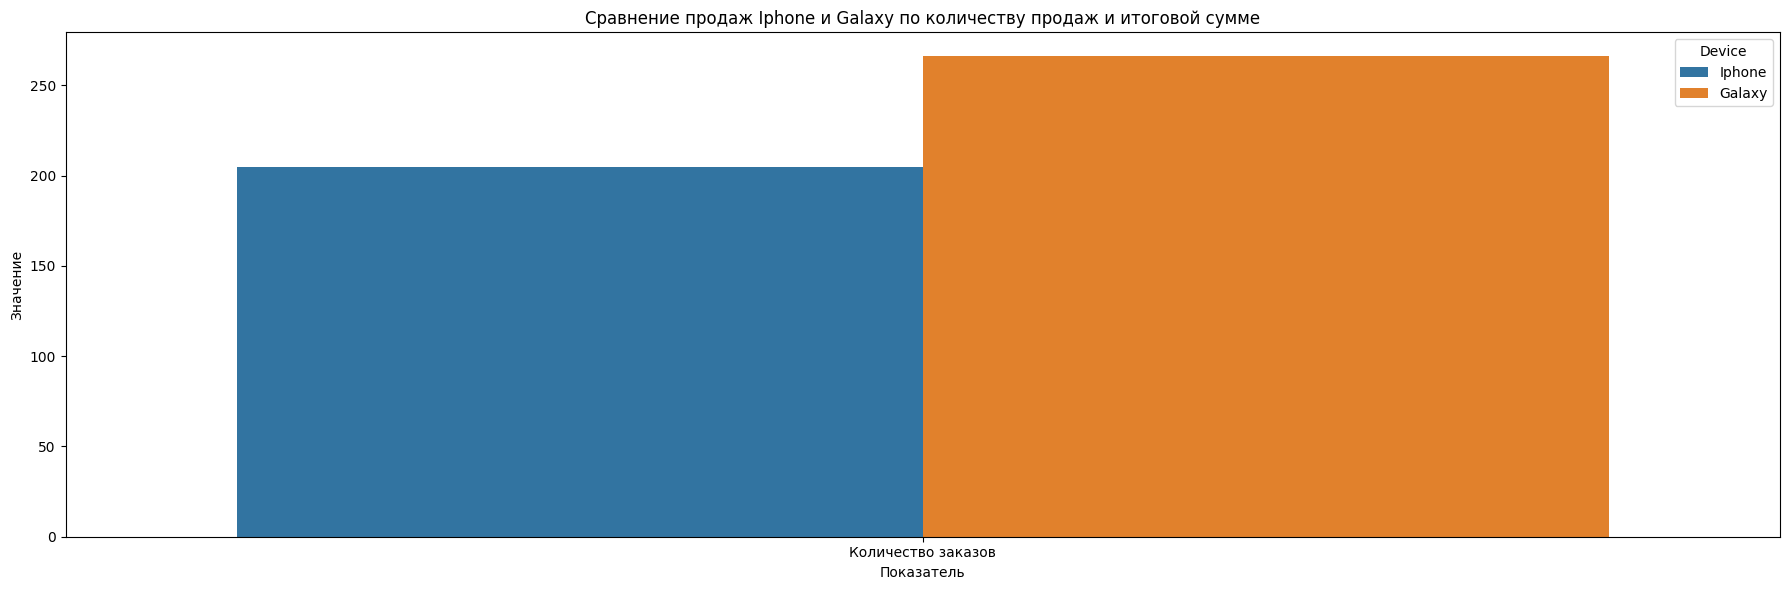

In [185]:
#Визуализация

plt.figure(figsize=(18,6))
comparison_df_melted = comparison_df.query('Показатель ==  "Количество заказов"').melt(id_vars='Показатель', value_vars=['Iphone', 'Galaxy'], var_name='Device', value_name='Value')
ax = sns.barplot(comparison_df_melted, x='Показатель', y='Value', hue='Device')
ax.set_title('Сравнение числа заказов Iphone и Galaxy по количеству продаж и итоговой сумме')
ax.set_ylabel('Значение')
ax.set_xlabel('Показатель')
plt.tight_layout()
plt.show()

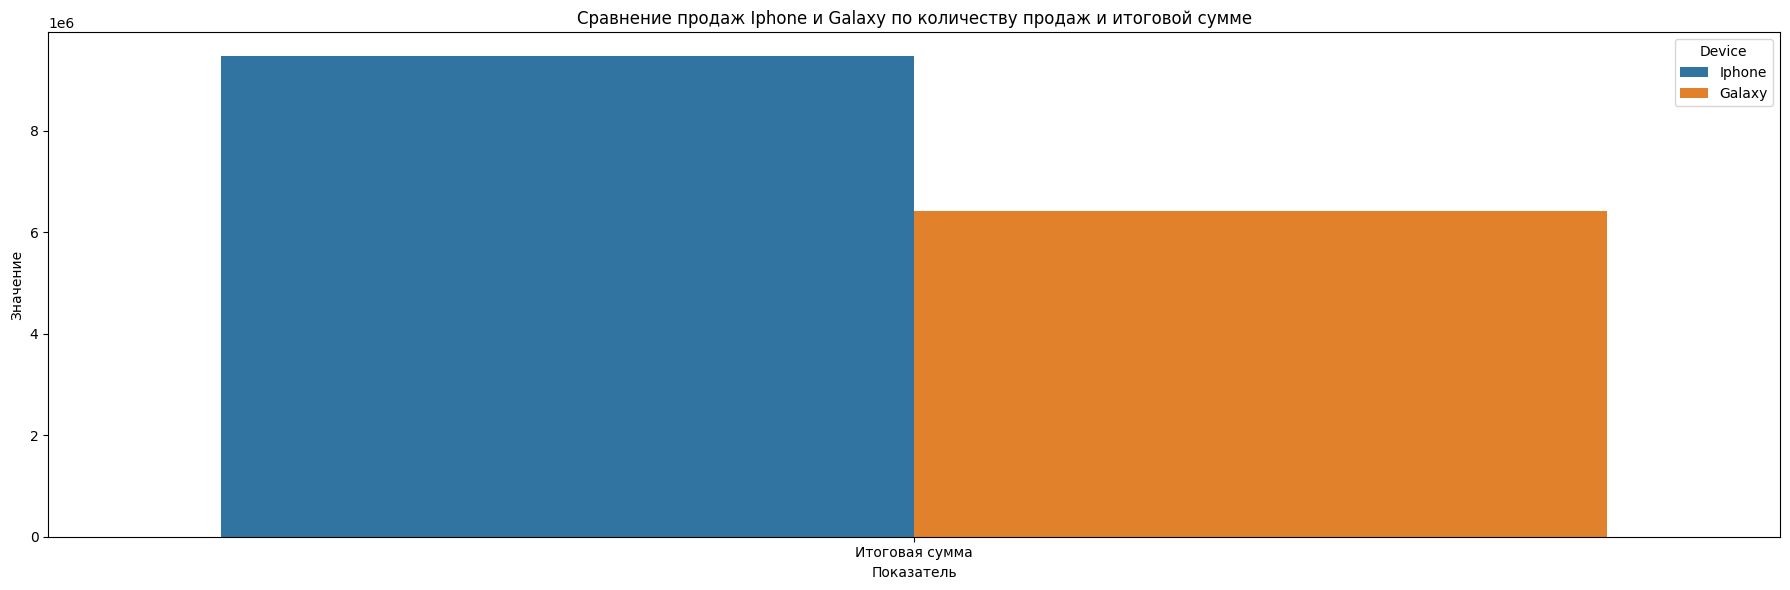

In [186]:
plt.figure(figsize=(18,6))
comparison_df_melted = comparison_df.query('Показатель ==  "Итоговая сумма"').melt(id_vars='Показатель', value_vars=['Iphone', 'Galaxy'], var_name='Device', value_name='Value')
ax = sns.barplot(comparison_df_melted, x='Показатель', y='Value', hue='Device')
ax.set_title('Сравнение продаж Iphone и Galaxy по количеству продаж и итоговой сумме')
ax.set_ylabel('Значение')
ax.set_xlabel('Показатель')
plt.tight_layout()
plt.show()



1.   Количество продаж товаров Galaxy больше, чем iPhone (266 vs 205)
2.   Сумма продаж у товаров iPhone продаж больше, Чем у Galaxy (iPhone 9 469 897 vs Galaxy 6 414 854, Сумма)



##*Динамика продаж в разрезе категорий*

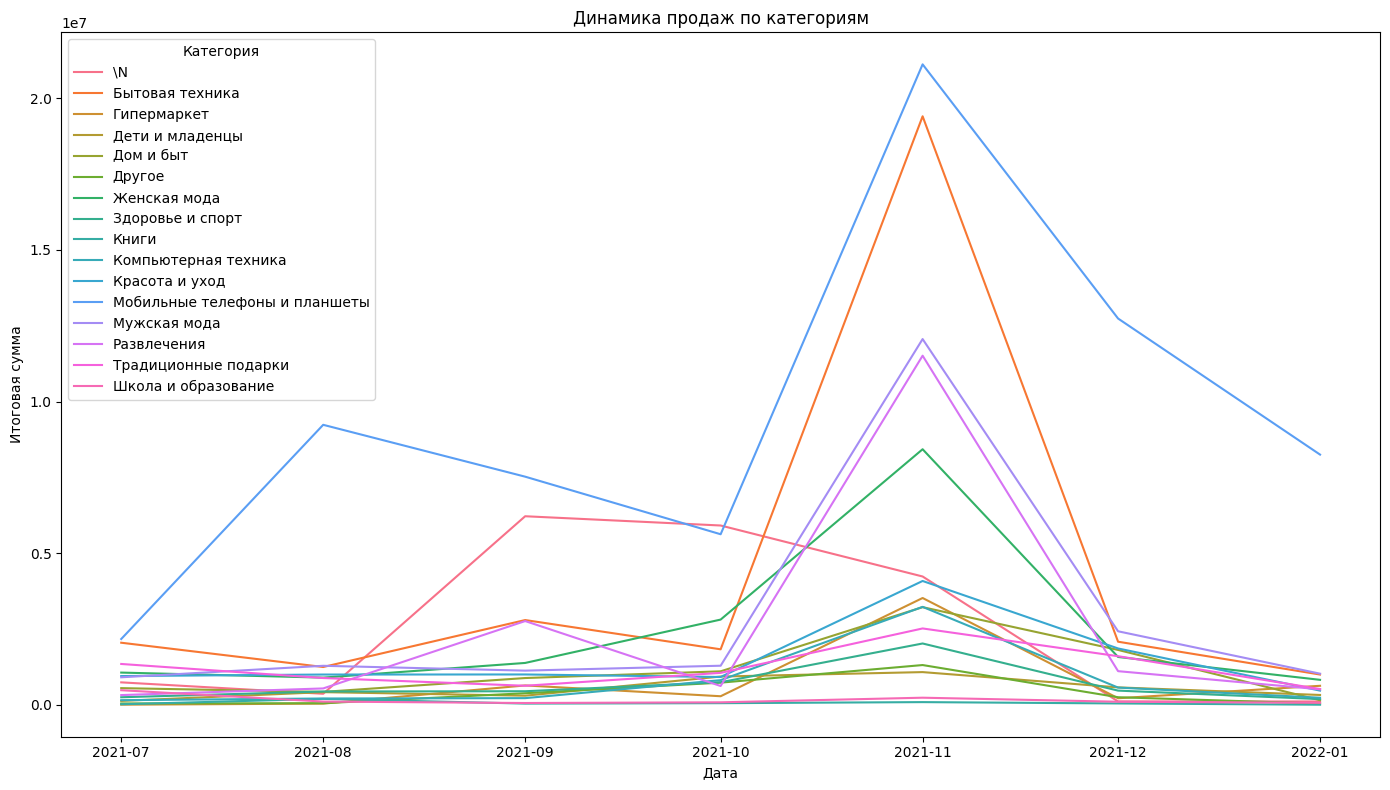

In [187]:
#Приведение
df['Итоговая сумма'] = pd.to_numeric(df['Итоговая сумма'], errors='coerce')
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y')

#Группировка по дате и категориям
sales_trend_by_category = df.query('Статус in ("завершен", "получен")').groupby([df['Дата создания'].dt.to_period('M'), 'Категория']).agg({'Итоговая сумма': 'sum'}).reset_index()
sales_trend_by_category['Дата создания'] = sales_trend_by_category['Дата создания'].dt.to_timestamp()

#Визуализация
plt.figure(figsize=(14,8))
ax = sns.lineplot(data=sales_trend_by_category, x='Дата создания', y='Итоговая сумма',hue='Категория')
ax.set_title('Динамика продаж по категориям')
ax.set_ylabel('Итоговая сумма')
ax.set_xlabel('Дата')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()




1.   У категории "Мобильные телефоны и планшеты" 2 пика - 08.2021 и 11.2021
2.   У категории /N был пик - 09.2021
3.   У категории Развлечения, Бытовая техника были пики - 09.2021, 11.2021
4.   У остальных категорий пик приходится на 11.2021



##*Доля повторных покупателей*

In [188]:
df['ID клиента'] = df['ID клиента'].astype(str)

#Количество заказов для каждого клиента
customer_order_counts = df['ID клиента'].value_counts()

# Клиенты, заказывавшие более одного раза
repeat_customers = customer_order_counts[customer_order_counts > 1].index

#Доля повторных покупателей
total_customers = df['ID клиента'].nunique()
repeat_customers_count = len(repeat_customers)
repeat_customers_ratio = repeat_customers_count / total_customers

print(f'Общее количество уникальных покупателей: {total_customers}')
print(f'Kоличество повторных покупателей: {repeat_customers_count}')
print(f'Доля повторных покупателей: {repeat_customers_ratio:.2%}')

Общее количество уникальных покупателей: 30874
Kоличество повторных покупателей: 15445
Доля повторных покупателей: 50.03%


Доля повторных покупателей 50% — это хороший показатель, на наш маркетплейс возвращаются

##*Корреляция между количеством заказов и категорией товаров*

In [189]:
#Замена значения '/N' на 'N' в стoлбце Категория
df['Категория'] = df['Категория'].replace('//N', 'N')

#One-hot encoding для категорий.Cтроковую переменную Категория кодируем в числовой формат
df_encoded = pd.get_dummies(df, columns=['Категория'])

#Для хранения индекса корреляции и пи значения
correlations = {}

for column in df_encoded.columns:
    if column.startswith('Категория_'):
        corr, p_value = pearsonr(df_encoded['Количество заказов'], df_encoded[column])
        correlations[column] = (corr, p_value)

#significant corr
significant_correlations = {key: value for key, value in correlations.items() if value[1]  < 0.05}

for key, value in significant_correlations.items():
    print(f'{key} : корреляция = {value[0]:.3f}, пи-значениe = {value[1]:.3f} ')

Категория_\N : корреляция = 0.015, пи-значениe = 0.000 
Категория_Бытовая техника : корреляция = -0.012, пи-значениe = 0.000 
Категория_Гипермаркет : корреляция = 0.015, пи-значениe = 0.000 
Категория_Женская мода : корреляция = -0.014, пи-значениe = 0.000 
Категория_Компьютерная техника : корреляция = -0.008, пи-значениe = 0.005 
Категория_Красота и уход : корреляция = -0.006, пи-значениe = 0.023 
Категория_Мобильные телефоны и планшеты : корреляция = -0.020, пи-значениe = 0.000 
Категория_Мужская мода : корреляция = -0.013, пи-значениe = 0.000 
Категория_Развлечения : корреляция = -0.011, пи-значениe = 0.000 
Категория_Традиционные подарки : корреляция = 0.053, пи-значениe = 0.000 




1.   Статистически значимой корреляции не обнаружено


##*Корреляция между количеством отмен и методом оплаты*

In [190]:
# Преобразуем столбец 'Статус' в бинарный формат (1 - отменен, 0 - выполнен), сохраняем в столбце 'Количество отмен'
df['Количество отмен'] = df['Статус'].apply(lambda x: 1 if x == 'отменен' else 0)

#One-hot encoding для категорий.Cтроковую переменную Метод оплаты кодируем в числовой формат
df_encoded = pd.get_dummies(df, columns=['Метод оплаты'])

#Инициализация словаря
correlations = {}

for column in df_encoded.columns:
    if column.startswith('Метод оплаты_'):
        corr, p_value = pearsonr(df_encoded['Количество отмен'], df_encoded[column])
        correlations[column] = (corr, p_value)

#significant corr
significant_correlations = {key: value for key, value in correlations.items() if value[1]  < 0.05}

for key, value in significant_correlations.items():
    print(f'{key} : Значимая корреляция = {value[0]:.3f}, пи-значениe = {value[1]:.3f} ')

Метод оплаты_ваучер : Значимая корреляция = 0.199, пи-значениe = 0.000 
Метод оплаты_дебетовая карта Raif : Значимая корреляция = 0.102, пи-значениe = 0.000 
Метод оплаты_клиентский кредит : Значимая корреляция = -0.071, пи-значениe = 0.000 
Метод оплаты_кредитная карта UBL : Значимая корреляция = 0.078, пи-значениe = 0.000 
Метод оплаты_маркетинговые расходы : Значимая корреляция = 0.035, пи-значениe = 0.000 
Метод оплаты_мобильный банкинг MCB : Значимая корреляция = 0.016, пи-значениe = 0.000 
Метод оплаты_наличные при доставке : Значимая корреляция = -0.044, пи-значениe = 0.000 
Метод оплаты_наложенный платеж : Значимая корреляция = -0.598, пи-значениe = 0.000 
Метод оплаты_платежная система Payaxis : Значимая корреляция = 0.528, пи-значениe = 0.000 
Метод оплаты_товарный кредит : Значимая корреляция = -0.013, пи-значениe = 0.000 


In [191]:
df.query('Статус == "отменен"').groupby('Метод оплаты').agg({'ID транзакции' : 'count'}).reset_index()

,Метод оплаты,ID транзакции
0,ваучер,12385
1,дебетовая карта Raif,638
2,клиентский кредит,18
3,кредитная карта UBL,635
4,маркетинговые расходы,284
5,мобильный банкинг MCB,177
6,наличные при доставке,5
7,наложенный платеж,4789
8,платежная система Payaxis,22249
9,товарный кредит,10


In [192]:
df.groupby('Метод оплаты').agg({'ID транзакции' : 'count'}).reset_index()

,Метод оплаты,ID транзакции
0,ваучер,25465
1,дебетовая карта Raif,658
2,клиентский кредит,1781
3,кредитная карта UBL,849
4,маркетинговые расходы,512
5,мобильный банкинг MCB,415
6,наличные при доставке,681
7,наложенный платеж,80369
8,платежная система Payaxis,29153
9,товарный кредит,118




1.   Обнаружена значимая корреляция между Методом оплаты (платежная система Payaxis 0.53, ваучер 0.2) и отменами


##*Изучение аудитории по дате начала обслуживания*

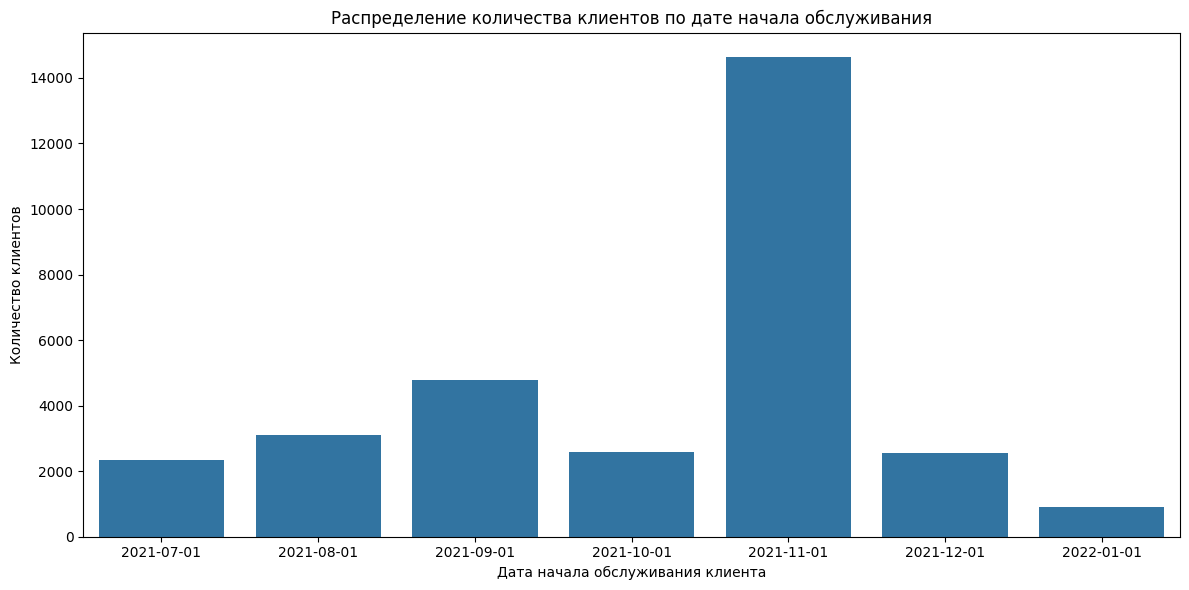

In [193]:
# Преобразуем столбец 'Дата начала обслуживания' к типу datetime
df['Дата начала обслуживания клиента'] = pd.to_datetime(df['Дата начала обслуживания клиента'], format = '%Y-%m')

#Группировка клиентов по дате начала обслуживания и подсчет уникальных клиентов
clients_per_date = df.groupby('Дата начала обслуживания клиента')['ID клиента'].nunique().reset_index()

#Переименование
clients_per_date.columns = ['Дата начала обслуживания клиента', 'Количество клиентов']

#Визуализация
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Дата начала обслуживания клиента', y='Количество клиентов', data=clients_per_date)
ax.set_title('Распределение количества клиентов по дате начала обслуживания')
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Дата начала обслуживания клиента')
plt.tight_layout()
plt.show()



1.   Максимальное число клиентов были привлечены 2021.11



##*Лайфтайм клиента в месяцах*

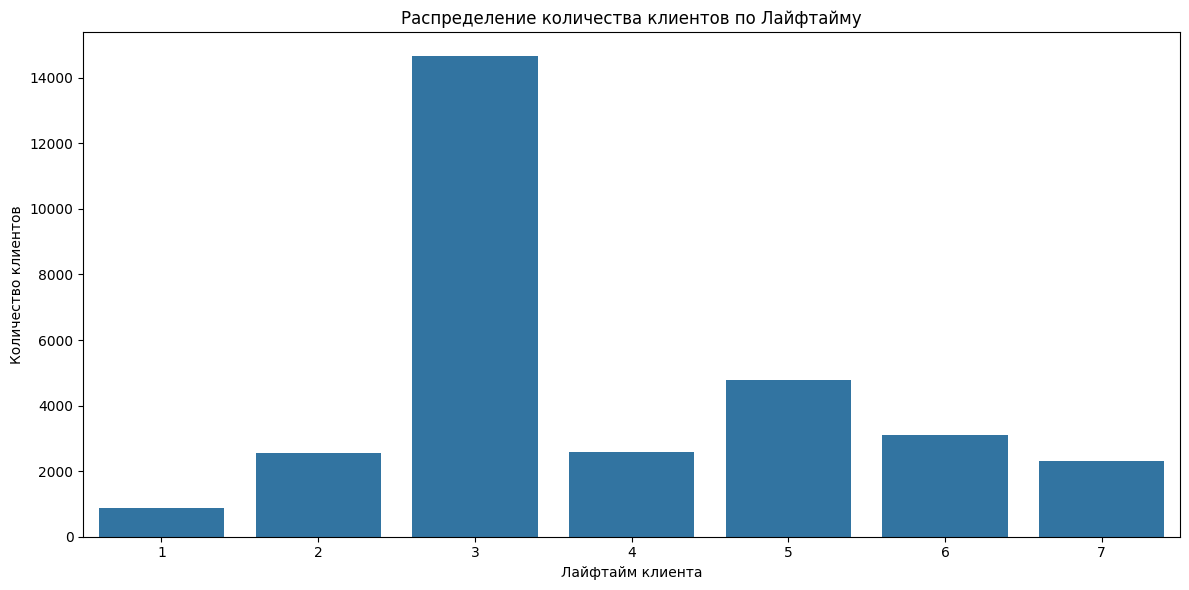

In [194]:
#Определение даты - референса
reference_date = pd.to_datetime('2022-02', format='%Y-%m')

#Лайфтайм клиента в месяцах
df['Лайфтайм клиента в месяцах'] = (reference_date.year - df['Дата начала обслуживания клиента'].dt.year) * 12 + (reference_date.month - df['Дата начала обслуживания клиента'].dt.month)

#Группировка клиентов по дате начала обслуживания и подсчет уникальных клиентов
clients_per_life = df.groupby('Лайфтайм клиента в месяцах')['ID клиента'].nunique().reset_index()

#Переименование
clients_per_life.columns = ['Лайфтайм клиента в месяцах', 'Количество клиентов']

#Визуализация
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Лайфтайм клиента в месяцах', y='Количество клиентов', data=clients_per_life)
ax.set_title('Распределение количества клиентов по Лайфтаймy')
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Лайфтайм клиента')
plt.tight_layout()
plt.show()


1.   Больше всего клиентов с лайфтаймом 3 месяца



## **Общие выводы по первой части исследования**

1. Данные охватывают период с 2021.07.01  по 2022.01.12
2. Уникальных клиентов 30874, Уникальных категорий 16, Уникальных методов оплаты 10, Уникальныx статусов 9
3. Средний чек клиента: 2716
4. Заказов в статусе завершен 77810, в статусе отменен 41190
5. Пик продаж пришелся на 11.2021  42278 выполненных заказов на итоговую сумму 98 070 888, далее снижение в 12.2021 с 9123 выполненных заказов на итоговую сумму 27 540 437
6. Больше всего продаж приходится на четверг
7. Большая часть продаж приходится на категорию Мобильные телефоны и планшеты (30%), далее идет Бытовая техника (14%) и мужская мода (9%)
8. Больше всего отмен в категории Развлечения
9. Больше всего скидок в ктегориях Мобильные телефоны и планшеты, Бытовая техника,  Развлечения
10. Самый продаваемый товар  Al Muhafiz Sohan Halwa Almond (1615  заказов)


##**Общие выводы по второй части исследования**



1. Количество продаж товаров Galaxy больше, чем iPhone (266 vs 205)
2. Сумма продаж у товаров iPhone продаж больше, Чем у Galaxy (iPhone 9 469 897 vs Galaxy 6 414 854, Сумма)
3. У категории "Мобильные телефоны и планшеты" 2 пика - 08.2021 и 11.2021
4. У категории /N был пик - 09.2021
5. У категории Развлечения, Бытовая техника были пики - 09.2021, 11.2021
6. У остальных категорий пик приходится на 11.2021
7. Доля повторных покупателей 50% — это хороший показатель, на наш маркетплейс возвращаются
8. Статистически значимой корреляции между количеством заказов и категорией товаров не обнаружено
9. Обнаружена значимая корреляция между Методом оплаты (платежная система Payaxis 0.53, ваучер 0.2) и отменами
10. Максимальное число клиентов были привлечены 11.2021
11. Больше всего клиентов с лайфтаймом 3 месяца
